<a href="https://colab.research.google.com/github/FGalvao77/RNA-c-Perceptron-de-Multiplas-Camadas-VS-Regressao-linear-c-Descida-de-Gradiente-Estocastica/blob/main/RNA_VS_Regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **RNA c/ _Perceptron de Múltiplas Camadas_ `VS` Regressão linear c/ _Descida de Gradiente Estocástica_**
---
---

Nesse _notebook_ iremos aplicar dois modelos de regressão:
- Rede Neural Artificial e 
- Regressão Linear .

De início, iremos utilizar uma variável preditora para avaliar a capacidade de predizer dos modelos.

E logo após, iremos utilizar outras variáveis de entrada para novamente aplicar os modelos e avaliá-los e, por fim iremos utilizar uma técnica de otimização dos hiperparâmetros.

<br>

In [1]:
# importando as bibliotecas
import pandas as pd                 # modelagem dos dados
import numpy as np                  # recursos matemáticos
import matplotlib.pyplot as plt     # visualização gráfica
import warnings                     # ignorar mensagens de alertas

# importando as funções/métodos
from seaborn.utils import get_dataset_names                     # visualizar conjunto de dados
from seaborn import load_dataset                                # carregar conjunto de dados
from sklearn.preprocessing import StandardScaler                # normalização dos dados
from sklearn.model_selection import train_test_split as tts     # particionamento dos dados
from sklearn.metrics import r2_score                            # métrica de avaliação do modelo
from sklearn.linear_model import SGDRegressor                   # modelo de regressão linear
from sklearn.neural_network import MLPRegressor                 # modelo de rede neural

# configurando o ambiente
%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore') 

In [2]:
# com a função "get_dataset_names()", podemos visualizar os conjuntos de dados presente na biblioteca seaborn
datasets = get_dataset_names()
datasets

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

> Como exemplo prático, iremos utilizar o conjunto de dados `mpg`.

In [3]:
# instanciando o conjunto de dados "mpg" na variável "data"
data = load_dataset('mpg')
data.head() # visualizando as 5 primeiras observações do conjunto de dados

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
# informações gerais
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


> Nossa variável alvo é a `mpg` _(milhas por galão)_, que se relaciona com os demais atributos.

- `cylinders`: cilindros;
- `displacement`: deslocamento;
- `horsepower`: potência;
- `weight`: peso;
- `acceleration`: aceleração;
- `model_year`: ano do modelo;
- `origin`: país de origem;
- `name`: nome do carro.

In [5]:
# estatística descritiva do conjunto de dados
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
# visualizando a presença de valores ausentes/nulos
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [7]:
# calculando a porcentagem de valores ausentes/nulos em relação ao total de observações presente no conjunto de dados
(data['horsepower'].isna().sum() / data.shape[0]) * 100

1.507537688442211

In [9]:
# visualizando o valor médio da coluna "horsepower"
horsepower_meam = round(data['horsepower'].mean(), 4)
horsepower_meam

104.4694

In [10]:
# preenchendo as linhas com valores médio da coluna "horsepower"
data.fillna(horsepower_meam, inplace=True)

In [11]:
# data.dropna(inplace=True)

In [12]:
# visualizando os valores ausentes/nulos
data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

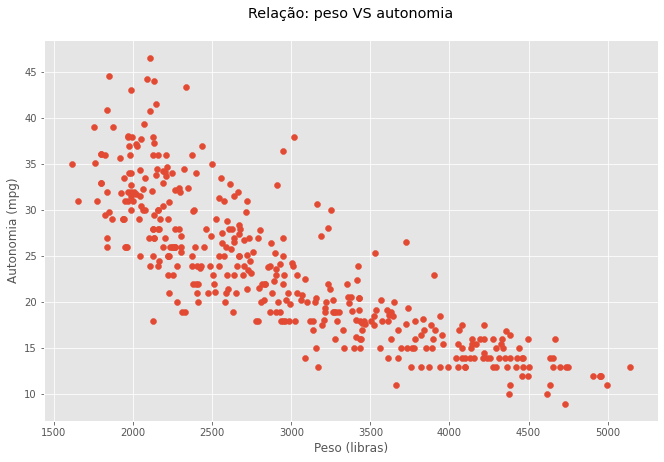

In [13]:
# visualizando a distribuição dos dados - peso (libras) VS autonomia (mpg)
plt.figure(figsize=(11, 7))

plt.scatter(data[['weight']], data[['mpg']])
plt.title('Relação: peso VS autonomia\n')
plt.xlabel('Peso (libras)')
plt.ylabel('Autonomia (mpg)')
plt.show()

In [14]:
# instanciando a variável explicativa (X) e a resposta (y)
X = data[['weight']]        # peso
y = data[['mpg']]           # milhas por galão

In [15]:
# realizando a conversão das variáveis
X['weight'] = X['weight'] * 0.453592    # libras para kilogramas
y['mpg'] = y['mpg'] * 0.425144          # milhas por galão para kilometros por litro

In [16]:
# visualizando as 10 primeiras observações da variavel X
X.head(10).T

,0,1,2,3,4,5,6,7,8,9
weight,1589.386368,1675.115256,1558.542112,1557.181336,1564.438808,1969.042872,1974.939568,1955.888704,2007.1446,1746.3292


In [17]:
# visualizando as 10 primeiras observações da variável y
y.head(10).T

,0,1,2,3,4,5,6,7,8,9
mpg,7.652592,6.37716,7.652592,6.802304,7.227448,6.37716,5.952016,5.952016,5.952016,6.37716


In [18]:
# estatística descritiva da variável X
X.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,398.0,1347.360846,384.120654,731.643896,1008.67521,1271.645172,1636.559936,2331.46288


In [19]:
# instanciando objeto para realizar o escalonamento dos dados
scaling = StandardScaler()

scaling.fit(X)                          # treinando o objeto
X_normal = scaling.fit_transform(X)     # realizando o escalonamento dos dados

In [20]:
# visualizando a estatística descritiva após o escalonamento
pd.DataFrame(X_normal).describe().T

,count,mean,std,min,25%,50%,75%,max
0,398.0,1.249698e-16,1.001259,-1.604943,-0.882827,-0.197362,0.753834,2.565185


In [21]:
# instanciando os dados de treino e teste
Xtrain_normal, Xtest_normal, yTrain, yTest = tts(
    X_normal,           # variável explicativa com dados normalizados
    y,                  # variável resposta
    test_size=0.4,      # 40% para teste do modelo
    random_state=1527   # taxa de aleatoriedade
)

In [22]:
# dimensão dos objetos - linhas e colunas
Xtrain_normal.shape, Xtest_normal.shape, yTrain.shape, yTest.shape

((238, 1), (160, 1), (238, 1), (160, 1))

In [25]:
# instanciando modelo de rede neural artificial: multi-layer perceptron
model_RNA = MLPRegressor(
    hidden_layer_sizes=(10, 5),     # tamanho das camadas ocultas: 1a camada com 10 neurônios | 2a camada com 5
    max_iter=2_000,                 # quantidade de iterações do modelo: 2 mil épocas
    tol=1e-7,                       # tolerância de  (0.1e-6 = 0.0000001)
    learning_rate_init=0.01,        # taxa de aprendizagem inicial
    solver='sgd',                   # função de resolução: sgd: stochastic gradient descent | descida de gradiente estocástica 
    activation='relu',              # função de ativação: relu
    learning_rate='constant',       # taxa de aprendizagem: constante
    verbose=2,                      # exibindo as iterações dos modelo
    random_state=1527               # taxa de aleatoriedade
)

# visualizando o modelo
model_RNA

MLPRegressor(hidden_layer_sizes=(10, 5), learning_rate_init=0.01, max_iter=2000,
             random_state=1527, solver='sgd', tol=1e-07, verbose=2)

In [26]:
# treinando o modelo rna
model_RNA.fit(Xtrain_normal, yTrain)

Iteration 1, loss = 52.99113427
Iteration 2, loss = 30.66689746
Iteration 3, loss = 4.33893815
Iteration 4, loss = 2.50854826
Iteration 5, loss = 1.83833056
Iteration 6, loss = 1.84469742
Iteration 7, loss = 2.11388973
Iteration 8, loss = 1.88378149
Iteration 9, loss = 1.79226328
Iteration 10, loss = 1.81078005
Iteration 11, loss = 1.75026514
Iteration 12, loss = 1.73519131
Iteration 13, loss = 1.72790597
Iteration 14, loss = 1.75624519
Iteration 15, loss = 1.78092479
Iteration 16, loss = 1.71689103
Iteration 17, loss = 1.74076657
Iteration 18, loss = 1.73229499
Iteration 19, loss = 1.73045488
Iteration 20, loss = 1.87181204
Iteration 21, loss = 1.68797268
Iteration 22, loss = 1.96114394
Iteration 23, loss = 1.77022428
Iteration 24, loss = 1.69510888
Iteration 25, loss = 1.68806771
Iteration 26, loss = 1.70178091
Iteration 27, loss = 1.69473794
Iteration 28, loss = 1.69755316
Iteration 29, loss = 1.67872276
Iteration 30, loss = 1.69944653
Iteration 31, loss = 1.76775229
Iteration 32, l

MLPRegressor(hidden_layer_sizes=(10, 5), learning_rate_init=0.01, max_iter=2000,
             random_state=1527, solver='sgd', tol=1e-07, verbose=2)

In [27]:
# instanciando modelo de regressão linear com SGD (Stochastic Gradient Descent | Descida de Gradiente Estocástica
model_LREG = SGDRegressor(
    max_iter=2_000,                 # quantidade de iterações do modelo: 2 mil épocas
    tol=1e-7,                       # tolerância de  (0.1e-6 = 0.0000001)
    eta0=0.01,                      # taxa de aprendizagem inicial
    learning_rate='constant',       # taxa de aprendizagem: constante
    verbose=2,                      # exibindo as iterações dos modelo
    random_state=1527               # taxa de aleatoriedade
)

# visualizando o modelo
model_LREG

SGDRegressor(learning_rate='constant', max_iter=2000, random_state=1527,
             tol=1e-07, verbose=2)

In [28]:
# treinando o modelo
model_LREG.fit(Xtrain_normal, yTrain)

-- Epoch 1
Norm: 2.70, NNZs: 1, Bias: 9.173028, T: 238, Avg. loss: 13.143783
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 2.93, NNZs: 1, Bias: 10.025376, T: 476, Avg. loss: 1.862081
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 2.93, NNZs: 1, Bias: 10.032147, T: 714, Avg. loss: 1.798103
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 2.91, NNZs: 1, Bias: 9.990732, T: 952, Avg. loss: 1.796722
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 2.91, NNZs: 1, Bias: 9.949146, T: 1190, Avg. loss: 1.796613
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 2.88, NNZs: 1, Bias: 10.002688, T: 1428, Avg. loss: 1.794617
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.99, NNZs: 1, Bias: 10.089651, T: 1666, Avg. loss: 1.792227
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 2.88, NNZs: 1, Bias: 9.958970, T: 1904, Avg. loss: 1.795672
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.84, NNZs: 1, Bias: 9.869451, T: 2142, Avg. loss: 1.790698
Total training time: 0.00 

SGDRegressor(learning_rate='constant', max_iter=2000, random_state=1527,
             tol=1e-07, verbose=2)

In [29]:
# realizando as predições com os modelos e visualizando os resultados
yPred_RNA = model_RNA.predict(Xtest_normal)
yPred_LREG = model_LREG.predict(Xtest_normal)

print(
    '\t\t\t\tPrediction\n'
    '========================================================================\n\n'
    f'yPred_RNA:\n{yPred_RNA[:25]}',
    f'yPred_LREG:\n{yPred_LREG[:25]}',
    sep='\n\n'
)

				Prediction

yPred_RNA:
[11.06394705 13.96485996 13.37440866  5.89176705  5.04260925 12.89092318
  6.63346819 12.56146847  7.01062354  7.35450048 10.29533381  9.35535381
  5.56029889 13.01928216  9.84198062  8.35273211  9.01845832 11.5559898
 12.69410608  9.72136372  7.59854217 13.80227192 12.43310949 12.00524623
  6.93297391]

yPred_LREG:
[11.24318115 13.6149284  13.13218339  5.42575391  4.11044865 12.73689218
  6.5556571  12.46753445  7.15034298  7.69255659 10.61351374  9.82293133
  4.92201998 12.84183675 10.23221515  9.02185446  9.53958099 11.64546867
 12.57597717 10.13076873  8.07735334 13.48199862 12.36258988 12.01277466
  7.02790765]


In [30]:
# calculando e visualizando o R2 dos modelos
r2_RNA = r2_score(yTest, yPred_RNA)
r2_LREG = r2_score(yTest, yPred_LREG)

print(
    '\tR2 score\n'
    '============================\n'
    f'R2 MLP: {r2_RNA}',
    f'\nR2 LREG: {r2_LREG}'
)

	R2 score
R2 MLP: 0.7078026259006416 
R2 LREG: 0.6724373977196553


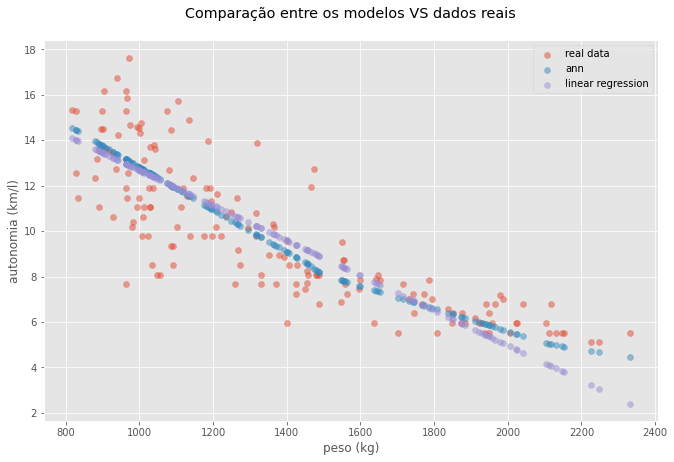

In [31]:
# realizando a re-transformação dos dados
Xtest = scaling.inverse_transform(Xtest_normal)

# plotando o gráfico de dispersão
plt.figure(figsize=(11, 7))

plt.scatter(Xtest, yTest, alpha=0.5, label='real data')
plt.scatter(Xtest, yPred_RNA, alpha=0.5, label='ann')
plt.scatter(Xtest, yPred_LREG, alpha=0.5, label='linear regression')
plt.xlabel('peso (kg)')
plt.ylabel('autonomia (km/l)')
plt.title('Comparação entre os modelos VS dados reais\n')
plt.legend(loc=1)
plt.show()

In [32]:
# realizando predição com o modelo com um dados fictício
X_future = np.array([[1_250]])
X_futureNorm = scaling.transform(X_future.T) # escalando o dado

In [33]:
# realizando as predições com os modelos e visualizando os resultados
yPred_RNA_future = model_RNA.predict(X_futureNorm)
yPred_LREG_future = model_LREG.predict(X_futureNorm)

print(
    f'ANN: {yPred_RNA_future}',
    f'\nLReg: {yPred_LREG_future}'
)

ANN: [10.46159891] 
LReg: [10.75070944]


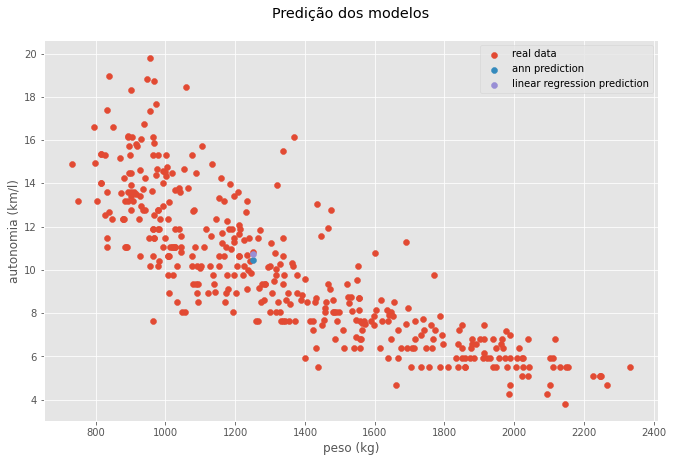

In [34]:
# realizando a plot da predição do dado fictício
plt.figure(figsize=(11, 7))

plt.scatter(X, y, label='real data')
plt.scatter(X_future, yPred_RNA_future, label='ann prediction')
plt.scatter(X_future, yPred_LREG_future, label='linear regression prediction')
plt.xlabel('peso (kg)')
plt.ylabel('autonomia (km/l)')
plt.title('Predição dos modelos\n')
plt.legend(loc=1)
plt.show();

#### **Instanciando novas variáveis de entrada**

In [35]:
# visualizando o nome dos atributos presente no conjunto de dados
data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [36]:
# selecionando as variáveis de interesse
features = data.columns[1:6]
features

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [37]:
# instanciando as variváveis explicativas e a resposta
X = data[features]
y = data[['mpg']]

In [38]:
# realizando a conversão das variáveis "weight" e "mpg"
X['weight'] = X['weight'] * 0.453592
y['mpg'] = y['mpg'] * 0.425144

In [39]:
# visualizando as 10 primeiras observações da variável X
X.head(10).T

,0,1,2,3,4,5,6,7,8,9
cylinders,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0000,8.0000
displacement,307.000000,350.000000,318.000000,304.000000,302.000000,429.000000,454.000000,440.000000,455.0000,390.0000
horsepower,130.000000,165.000000,150.000000,150.000000,140.000000,198.000000,220.000000,215.000000,225.0000,190.0000
weight,1589.386368,1675.115256,1558.542112,1557.181336,1564.438808,1969.042872,1974.939568,1955.888704,2007.1446,1746.3292
acceleration,12.000000,11.500000,11.000000,12.000000,10.500000,10.000000,9.000000,8.500000,10.0000,8.5000


In [40]:
# visualizando as 10 primeiras observações da variável y
y.head(10).T

,0,1,2,3,4,5,6,7,8,9
mpg,7.652592,6.37716,7.652592,6.802304,7.227448,6.37716,5.952016,5.952016,5.952016,6.37716


In [41]:
# estatística descritiva 
X.describe().T

,count,mean,std,min,25%,50%,75%,max
cylinders,398.0,5.454774,1.701004,3.000000,4.00000,4.000000,8.000000,8.00000
displacement,398.0,193.425879,104.269838,68.000000,104.25000,148.500000,262.000000,455.00000
horsepower,398.0,104.469388,38.199187,46.000000,76.00000,95.000000,125.000000,230.00000
weight,398.0,1347.360846,384.120654,731.643896,1008.67521,1271.645172,1636.559936,2331.46288
acceleration,398.0,15.568090,2.757689,8.000000,13.82500,15.500000,17.175000,24.80000


In [42]:
# escalonamento dos dados
scaling = StandardScaler()

scaling.fit(X)
X_normal = scaling.fit_transform(X)

In [43]:
# estatística descritiva após o escalonamento
pd.DataFrame(X_normal).describe().T

,count,mean,std,min,25%,50%,75%,max
0,398.0,-3.570567e-17,1.001259,-1.444949,-0.856321,-0.856321,1.498191,1.498191
1,398.0,-1.785283e-17,1.001259,-1.204411,-0.856318,-0.431404,0.658488,2.511784
2,398.0,3.213510e-16,1.001259,-1.532571,-0.746226,-0.248207,0.538138,3.290348
3,398.0,1.249698e-16,1.001259,-1.604943,-0.882827,-0.197362,0.753834,2.565185
4,398.0,-2.677925e-16,1.001259,-2.747814,-0.632879,-0.024722,0.583435,3.351912


In [44]:
# visualizando a presença de valores ausentes/nulos
pd.DataFrame(X_normal).isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [45]:
# instanciando os dados de treino e teste
Xtrain_normal, Xtest_normal, yTrain, yTest = tts(
    X_normal, y , test_size=0.4, random_state=1527
)

In [46]:
# visualizando a dimensão dos objetos - linhas e colunas
Xtrain_normal.shape, Xtest_normal.shape, yTrain.shape, yTest.shape

((238, 5), (160, 5), (238, 1), (160, 1))

In [47]:
# modelo de rna
model_RNA2 = MLPRegressor(
    hidden_layer_sizes=(10, 5),     # tamanho das camadas ocultas: 1a camada com 10 neurônios | 2a camada com 5
    max_iter=2_000,                 # quantidade de iterações do modelo: 2 mil épocas
    tol=1e-7,                       # tolerância de  (0.1e-6 = 0.0000001)
    learning_rate_init=0.01,        # taxa de aprendizagem inicial
    solver='sgd',                   # função de resolução: sgd: stochastic gradient descent | descida de gradiente estocástica 
    activation='relu',              # função de ativação: relu
    learning_rate='constant',       # taxa de aprendizagem: constante
    verbose=2,                      # exibindo as iterações dos modelo
    random_state=1527               # taxa de aleatoriedade
)

model_RNA2

MLPRegressor(hidden_layer_sizes=(10, 5), learning_rate_init=0.01, max_iter=2000,
             random_state=1527, solver='sgd', tol=1e-07, verbose=2)

In [48]:
# treinamento do modelo
model_RNA2.fit(Xtrain_normal, yTrain)

Iteration 1, loss = 61.86577843
Iteration 2, loss = 45.62215837
Iteration 3, loss = 37.11614412
Iteration 4, loss = 25.91458284
Iteration 5, loss = 10.40977235
Iteration 6, loss = 5.71438031
Iteration 7, loss = 2.18882260
Iteration 8, loss = 2.40568559
Iteration 9, loss = 1.96779055
Iteration 10, loss = 1.99297775
Iteration 11, loss = 1.83421794
Iteration 12, loss = 1.61688688
Iteration 13, loss = 1.58119497
Iteration 14, loss = 1.66632439
Iteration 15, loss = 1.57240761
Iteration 16, loss = 1.76875924
Iteration 17, loss = 1.58805256
Iteration 18, loss = 2.13261619
Iteration 19, loss = 1.55578013
Iteration 20, loss = 1.57234227
Iteration 21, loss = 1.81804011
Iteration 22, loss = 1.71375700
Iteration 23, loss = 1.50417760
Iteration 24, loss = 1.50695488
Iteration 25, loss = 1.55003511
Iteration 26, loss = 1.59905961
Iteration 27, loss = 1.68492931
Iteration 28, loss = 1.62573981
Iteration 29, loss = 1.47780331
Iteration 30, loss = 1.46396950
Iteration 31, loss = 1.46663630
Iteration 32

MLPRegressor(hidden_layer_sizes=(10, 5), learning_rate_init=0.01, max_iter=2000,
             random_state=1527, solver='sgd', tol=1e-07, verbose=2)

In [49]:
# modelo de regressão
model_LREG2 = SGDRegressor(
    max_iter=2_000,                 # quantidade de iterações do modelo: 2.500 épocas
    tol=1e-7,                       # tolerância de  (0.1e-7 = 0.0000001)
    eta0=0.01,                      # taxa de aprendizagem inicial
    learning_rate='constant',       # taxa de aprendizagem: constante
    verbose=2,                      # exibindo as iterações dos modelo
    random_state=1527               # taxa de aleatoriedade
)

model_LREG2

SGDRegressor(learning_rate='constant', max_iter=2000, random_state=1527,
             tol=1e-07, verbose=2)

In [50]:
# treinando o modelo
model_LREG2.fit(Xtrain_normal, yTrain)

-- Epoch 1
Norm: 1.39, NNZs: 5, Bias: 9.251642, T: 238, Avg. loss: 12.908545
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 1.67, NNZs: 5, Bias: 10.104236, T: 476, Avg. loss: 1.847925
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.67, NNZs: 5, Bias: 10.053195, T: 714, Avg. loss: 1.781510
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 1.78, NNZs: 5, Bias: 10.090184, T: 952, Avg. loss: 1.757446
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.79, NNZs: 5, Bias: 10.018304, T: 1190, Avg. loss: 1.722167
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.98, NNZs: 5, Bias: 10.045076, T: 1428, Avg. loss: 1.737425
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 2.07, NNZs: 5, Bias: 10.131607, T: 1666, Avg. loss: 1.739534
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.95, NNZs: 5, Bias: 9.995891, T: 1904, Avg. loss: 1.716017
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 2.05, NNZs: 5, Bias: 9.923731, T: 2142, Avg. loss: 1.741217
Total training time: 0.0

SGDRegressor(learning_rate='constant', max_iter=2000, random_state=1527,
             tol=1e-07, verbose=2)

In [51]:
# realizando a predição com os modelos
yPred_RNA2 = model_RNA2.predict(Xtest_normal)
yPred_LREG2 = model_LREG2.predict(Xtest_normal)

print(
    '\t\t\t\tPrediction\n'
    '========================================================================\n\n'
    f'yPred_ANN:\n{yPred_RNA2[:25]}',
    f'yPred_LREG:\n{yPred_LREG2[:25]}',
    sep='\n\n'
)

				Prediction

yPred_ANN:
[10.78419257 13.5643916  12.8639415   5.80593726  5.80593726 12.83565786
  6.556215   12.60115476  7.90414806  7.92623351  9.90697565  8.89012474
  5.80593726 12.80483487  9.3081021  11.42726074  8.90193429 11.3480463
 11.01761748  9.93415031  7.92953362 13.90182699 11.9999583  12.12925792
  7.80441274]

yPred_LREG:
[11.07911818 12.97030419 12.84126038  4.56163596  4.47624016 12.53903529
  6.58362364 12.23408189  8.50457347  8.66389984 10.6775584  10.16984297
  4.920987   12.58236279 10.35845892 10.7994139   9.90927863 11.50914985
 11.63212367 10.09461893  8.67704532 13.0752575  11.44651582 12.32901039
  7.85571721]


In [52]:
# visualizando o R2 dos modelos
r2_RNA2 = r2_score(yTest, yPred_RNA2)
r2_LREG2 = r2_score(yTest, yPred_LREG2)

print(
    '\tR2 score\n'
    '============================\n'
    f'R2 ANN: {r2_RNA2}',
    f'\nR2 LREG: {r2_LREG2}'
)

	R2 score
R2 ANN: 0.7090604169902595 
R2 LREG: 0.6520026752506716


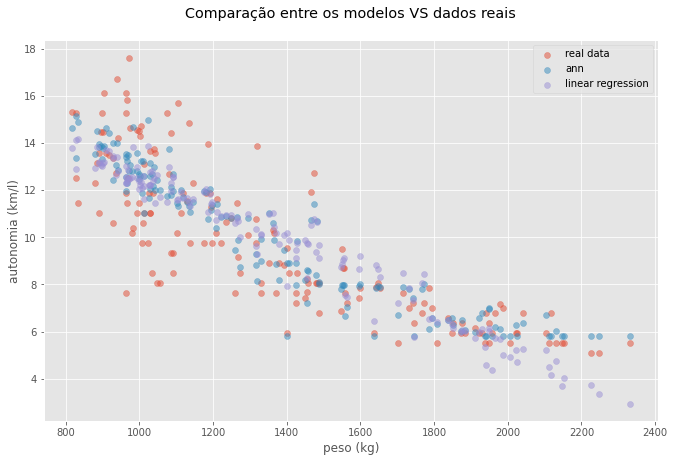

In [53]:
# plotando o gráfico
# Xtest = scaling.inverse_transform(Xtest_normal)

plt.figure(figsize=(11, 7))

plt.scatter(Xtest, yTest, alpha=0.5, label='real data')
plt.scatter(Xtest, yPred_RNA2, alpha=0.5, label='ann')
plt.scatter(Xtest, yPred_LREG2, alpha=0.5, label='linear regression')
plt.xlabel('peso (kg)')
plt.ylabel('autonomia (km/l)')
plt.title('Comparação entre os modelos VS dados reais\n')
plt.legend(loc=1)
plt.show()

In [54]:
# visualizando os atributos de entrada
features

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration'], dtype='object')

In [55]:
# visualizando um dado de entrada e saída
print(X[:1])
print()
print(y[:1])

   cylinders  displacement  horsepower       weight  acceleration
0          8         307.0       130.0  1589.386368          12.0

        mpg
0  7.652592


In [56]:
X_future = np.array([[8, 307.0, 130.0, 1589, 12.0]])
# X_futureNorm = scaling.transform(X_future.T)

In [57]:
# realizando a predição com o dado isntanciado acima
yPred_RNA_future = model_RNA2.predict(X_future)
yPred_LREG_future = model_LREG2.predict(X_future)

print(
    f'ANN: {yPred_RNA_future}',
    f'\nLReg: {yPred_LREG_future}'
)

ANN: [5.80593726] 
LReg: [-3680.85219215]


<br>

#### **Busca dos melhores hiperparâmetros com algoritmo genético**

In [58]:
# instalando a biblioteca "sklearn-deap"
!pip install sklearn-deap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [59]:
# importando a função "EvolutionaryAlgorithmSearchCV"
from evolutionary_search import EvolutionaryAlgorithmSearchCV as ea

In [67]:
# instanciando as camadas de neurônios
s1 = [20, 50, 170, 300, 720, 1_000]
s2 = [20, 50, 170, 300, 720, 1_000]

# s1 = range(20, 10_000, 50)
# s2 = range(20, 10_000, 50)

# realizando um laço de repetição e salvando todas as combinações possíveis
pairs_neurons= []
for n1 in s1:
    for n2 in s2:
        pairs_neurons.append((n1, n2))

len(pairs_neurons)

36

In [68]:
# instanciando um dicionário com os hiperparâmetros
hyper_params = {
    'hidden_layer_sizes': pairs_neurons,
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [2_000, 5_000],
    'solver': ['adam', 'lbfgs'], # sgd, adam, lbfgs
    'tol': [1e-7]
}

In [69]:
# instanciando o modelo de algoritmo genético
alg_gen = ea(
    estimator=MLPRegressor(),
    params=hyper_params,
    scoring='r2',
    cv=5,
    population_size=10,
    generations_number=5,
    gene_mutation_prob=0.1,
    gene_crossover_prob=0.5,
    tournament_size=2,
    verbose=2,
    n_jobs=16
)

# visualizando o modelo
alg_gen

EvolutionaryAlgorithmSearchCV(cv=5, estimator=MLPRegressor(),
                              generations_number=5, n_jobs=16,
                              params={'hidden_layer_sizes': [(20, 20), (20, 50),
                                                             (20, 170),
                                                             (20, 300),
                                                             (20, 720),
                                                             (20, 1000),
                                                             (50, 20), (50, 50),
                                                             (50, 170),
                                                             (50, 300),
                                                             (50, 720),
                                                             (50, 1000),
                                                             (170, 20),
                                                             (1

In [70]:
# visualizando a presença de valores nulos
pd.DataFrame(Xtrain_normal).isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [71]:
# treinando o modelo
alg_gen.fit(Xtrain_normal, yTrain)

Types [1, 2, 1, 1, 2] and maxint [35, 2, 1, 1, 0] detected
--- Evolve in 432 possible combinations ---
[CV] END hidden_layer_sizes=(50, 170), learning_rate_init=0.1, max_iter=5000, solver=adam, tol=1e-07; total time=   4.3s
[CV] END hidden_layer_sizes=(50, 170), learning_rate_init=0.1, max_iter=5000, solver=adam, tol=1e-07; total time=   2.7s
[CV] END hidden_layer_sizes=(50, 170), learning_rate_init=0.1, max_iter=5000, solver=adam, tol=1e-07; total time=   4.2s
[CV] END hidden_layer_sizes=(50, 20), learning_rate_init=0.01, max_iter=2000, solver=adam, tol=1e-07; total time=  14.6s
[CV] END hidden_layer_sizes=(50, 170), learning_rate_init=0.1, max_iter=5000, solver=adam, tol=1e-07; total time=   3.6s
[CV] END hidden_layer_sizes=(50, 170), learning_rate_init=0.1, max_iter=5000, solver=adam, tol=1e-07; total time=   9.6s
[CV] END hidden_layer_sizes=(170, 720), learning_rate_init=0.01, max_iter=5000, solver=adam, tol=1e-07; total time=  26.2s
[CV] END hidden_layer_sizes=(50, 1000), learning

In [72]:
# visualizando os melhores hiperparâmetros
alg_gen.best_estimator_

MLPRegressor(hidden_layer_sizes=(170, 720), learning_rate_init=0.01,
             max_iter=5000, tol=1e-07)

In [73]:
# instanciando os melhores hiperparâmetros no objeto "best_params"
best_params = alg_gen.best_estimator_
best_params     # visualizando o conteúdo do objeto

MLPRegressor(hidden_layer_sizes=(170, 720), learning_rate_init=0.01,
             max_iter=5000, tol=1e-07)

In [74]:
# realizando a predição com o objeto "best_params"
y_pred = best_params.predict(Xtest_normal)

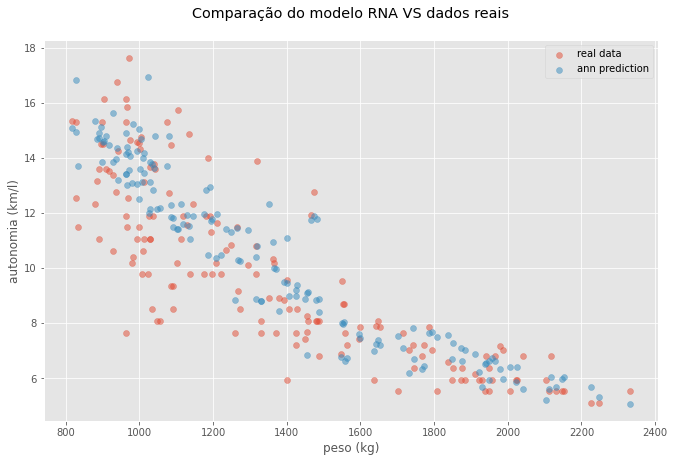

In [78]:
# plotando o gráfico
# Xtest = scaling.inverse_transform(Xtest_normal)

plt.figure(figsize=(11, 7))

plt.scatter(Xtest, yTest, alpha=0.5, label='real data')
plt.scatter(Xtest, y_pred, alpha=0.5, label='ann prediction')
plt.xlabel('peso (kg)')
plt.ylabel('autonomia (km/l)')
plt.title('Comparação do modelo RNA VS dados reais\n')
plt.legend(loc='upper right')
plt.show()